#Prueba Data Science - Scanntech
###*Juan Ignacio Szurlewicz*

###Librerias

In [1]:
import pandas as pd
from google.colab import drive
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn.linear_model import LinearRegression

###Archivos

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Carpeta zipeada
zip_file_path = '/content/drive/MyDrive/Scanntech/datos.zip'

#Path para extraer los archivos
path_destino = '/content/drive/MyDrive/Scanntech/Archivos'

#Creo la carpeta
os.makedirs(path_destino, exist_ok=True)

#Extraigo el contenido de la carpeta
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(path_destino)

path_archivos= os.path.join(path_destino,'datos')

#Listo los archivos extraidos
extracted_files = os.listdir(path_archivos)
print(extracted_files)

['.DS_Store', 'productos.csv', 'ventas.csv']


In [ ]:
#Base de ventas
_path_ventas = os.path.join(path_archivos,'ventas.csv')
_df_ventas = pd.read_csv(_path_ventas)
_df_ventas

,fecha_comercial,pdv_codigo,codigo_barras,imp_vta,cant_vta
0,2020-06-02,514,7730400001518,69.0,1
1,2020-06-17,8155,7734284001157,70.0,1
2,2020-06-11,7604,7730400003002,77.0,1
3,2020-06-02,3207,7734284001913,70.0,1
4,2020-06-07,8008,7730400001835,84.0,1
...,...,...,...,...,...
242241,2020-11-18,663,7730400003920,84.0,1
242242,2020-11-20,396,7730197008076,62.0,1
242243,2020-11-26,3727,7734284001185,59.0,1
242244,2020-11-11,7817,7730400003432,504.0,6


In [ ]:
#Base de productos
_path_productos = os.path.join(path_archivos,'productos.csv')
_df_productos = pd.read_csv(_path_productos)
_df_productos

,codigo_barras,descripcion,marca,proveedor,contenido
0,7730197008076,"AGUA SABORIZADA AQUARIUS MANZANA 1,5L",AQUARIUS,MONTEVIDEO REFRESCOS S.R.L.,1500
1,7730197008597,"AGUA SABORIZADA AQUARIUS NARANJA 1,5L",AQUARIUS,MONTEVIDEO REFRESCOS S.R.L.,1500
2,7730197008006,"AGUA SABORIZADA AQUARIUS PERA 1,5L",AQUARIUS,MONTEVIDEO REFRESCOS S.R.L.,1500
3,7734284001913,"AGUA SABORIZADA H2OH! CITRUS 1,5L",H2OH!,FNC S.A.,1500
4,7734284001185,"AGUA SABORIZADA H2OH! LIMA LIMON 1,5L",H2OH!,FNC S.A.,1500
5,7734284001766,"AGUA SABORIZADA H2OH! LIMONETO 1,5L",H2OH!,FNC S.A.,1500
6,7734284001157,"AGUA SABORIZADA H2OH! NARANCHELO 1,5L",H2OH!,FNC S.A.,1500
7,7730400003002,"AGUA SABORIZADA SALUS FRUTTE DURAZNO 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650
8,7730400003361,"AGUA SABORIZADA SALUS FRUTTE FRUTILLA 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650
9,7730400003104,"AGUA SABORIZADA SALUS FRUTTE MANZANA 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650


###Desarrollo

####Análisis inicial de los datos

#####***Base ventas***

In [ ]:
#Chequeo la presencia de valores faltantes
_df_ventas.isna().any()

fecha_comercial    False
pdv_codigo         False
codigo_barras      False
imp_vta            False
cant_vta           False
dtype: bool

In [ ]:
#Observo el tipo de datos y transformo "pdv_codigo","codigo_barras" a string y "fecha_comercial" a datetime
print(_df_ventas.dtypes)
_df_ventas_v2 = _df_ventas.copy()
_df_ventas_v2[['pdv_codigo', 'codigo_barras']] = _df_ventas_v2[['pdv_codigo', 'codigo_barras']].astype(str)
_df_ventas_v2['fecha_comercial'] = pd.to_datetime(_df_ventas_v2['fecha_comercial'])
_df_ventas_v2.dtypes

fecha_comercial     object
pdv_codigo           int64
codigo_barras        int64
imp_vta            float64
cant_vta             int64
dtype: object


fecha_comercial    datetime64[ns]
pdv_codigo                 object
codigo_barras              object
imp_vta                   float64
cant_vta                    int64
dtype: object

In [ ]:
#Observo las medidas descriptivas del campo de ventas y calculo el precio de venta.
_df_ventas_v2['precio'] = _df_ventas_v2['imp_vta']/_df_ventas_v2['cant_vta']
_df_ventas_v2[['imp_vta','cant_vta','precio']].describe()

,imp_vta,cant_vta,precio
count,242246.000000,242246.000000,242246.000000
mean,123.727381,1.482770,84.016572
std,83.693651,1.031854,12.476398
min,14.700000,1.000000,14.700000
25%,79.000000,1.000000,75.000000
50%,93.000000,1.000000,84.000000
75%,150.000000,2.000000,94.000000
max,4607.993000,72.000000,126.000000


Observo mediante un boxplot la distribución de la variable "Precio" calculada anteriormente, para detectar la presencia de valores outliers.

Text(0.5, 1.0, 'Distribución de la variable precio')

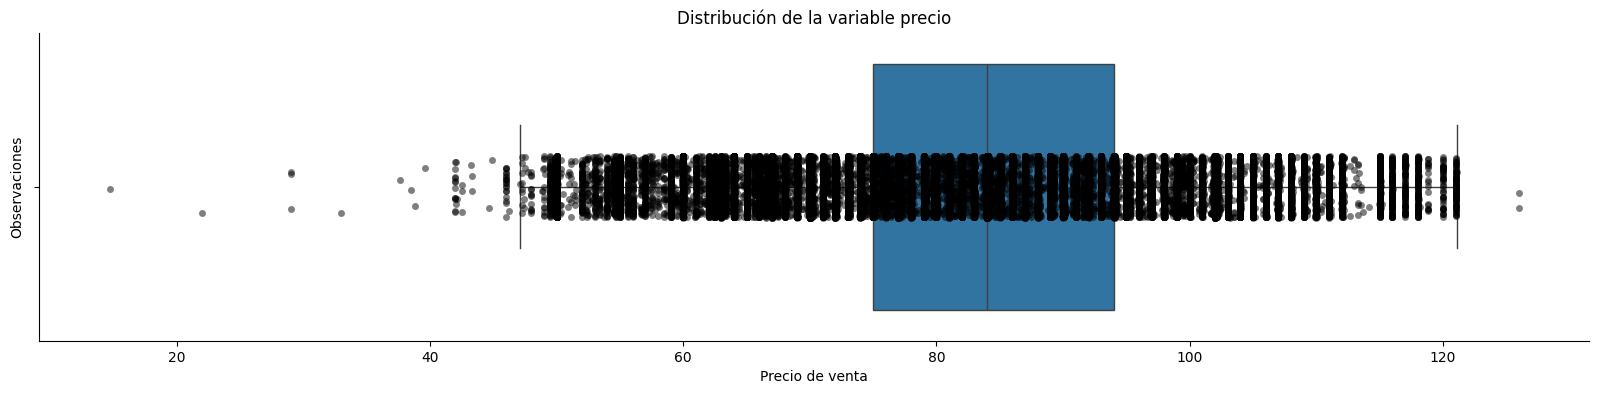

In [ ]:
plt.figure(figsize=(20, 4))
sns.boxplot(x=_df_ventas_v2['precio'], showfliers=False)
sns.stripplot(x=_df_ventas_v2['precio'], color='black', alpha=0.5)
sns.despine()

plt.xlabel('Precio de venta')
plt.ylabel('Observaciones')
plt.title('Distribución de la variable precio')

Existen algunos precios que podríamos clasificar como "outliers". Sin embargo, por el momento los dejamos en nuestro análisis. Desconocemos si puede deberse a alguna promoción de venta en particular, error en el sistema de ventas o si pueden ser errores de imputación. En caso de emplear alguna ténica que requiera apartarlos, lo haremos más adelante utilizando percentiles, por ejemplo. Otra alternativa sería aplicar algun método de imputación y corregirlos, por ejemplo, utilizando el método de KNN, pero siempre habiendo corroborado que efectivamente sea un dato erróneo.

#####***Base productos***

In [ ]:
#Chequeo la presencia de valores faltantes
_df_productos.isna().any()

codigo_barras    False
descripcion      False
marca            False
proveedor        False
contenido        False
dtype: bool

In [ ]:
#Observo el tipo de datos y transformo "codigo_barras" a string
_df_productos_v2 = _df_productos.copy()
_df_productos_v2['codigo_barras'] = _df_productos_v2['codigo_barras'].astype(str)
_df_productos.dtypes

codigo_barras     int64
descripcion      object
marca            object
proveedor        object
contenido         int64
dtype: object

In [ ]:
#Observo las medidas descriptivas de la variable "Contenido"
_df_productos_v2.describe()

,contenido
count,22.000000
mean,1636.363636
std,453.342564
min,0.000000
25%,1500.000000
50%,1650.000000
75%,1650.000000
max,2250.000000


Al existir un valor "0" para la variable contenido, lo cuál es imposible por la caracteristica del atributo y del producto, voy a imputar dicho valor utilizando para ello el campo de descripción.

In [ ]:
#Extraemos la medida de la descripción
def extraer_medida(descripcion):
    match = re.search(r'\d+,\d+L|\d+L', descripcion)
    return match.group(0) if match else None

_dict = {1500:'1,5L',1650:'1,65L',2250:'2,25L'}
_reversed_dict = {value: key for key, value in _dict.items()}

#Aplicamos la función a la variable medida
_df_productos_v2['medida'] = _df_productos_v2['descripcion'].apply(extraer_medida)
_df_productos_v2['medida'] = (_df_productos_v2['medida'].map(_reversed_dict))
_df_productos_v2=_df_productos_v2.drop(columns={'contenido'})
_df_productos_v2.rename(columns={'medida':'contenido'},inplace=True)
_df_productos_v2

,codigo_barras,descripcion,marca,proveedor,contenido
0,7730197008076,"AGUA SABORIZADA AQUARIUS MANZANA 1,5L",AQUARIUS,MONTEVIDEO REFRESCOS S.R.L.,1500
1,7730197008597,"AGUA SABORIZADA AQUARIUS NARANJA 1,5L",AQUARIUS,MONTEVIDEO REFRESCOS S.R.L.,1500
2,7730197008006,"AGUA SABORIZADA AQUARIUS PERA 1,5L",AQUARIUS,MONTEVIDEO REFRESCOS S.R.L.,1500
3,7734284001913,"AGUA SABORIZADA H2OH! CITRUS 1,5L",H2OH!,FNC S.A.,1500
4,7734284001185,"AGUA SABORIZADA H2OH! LIMA LIMON 1,5L",H2OH!,FNC S.A.,1500
5,7734284001766,"AGUA SABORIZADA H2OH! LIMONETO 1,5L",H2OH!,FNC S.A.,1500
6,7734284001157,"AGUA SABORIZADA H2OH! NARANCHELO 1,5L",H2OH!,FNC S.A.,1500
7,7730400003002,"AGUA SABORIZADA SALUS FRUTTE DURAZNO 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650
8,7730400003361,"AGUA SABORIZADA SALUS FRUTTE FRUTILLA 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650
9,7730400003104,"AGUA SABORIZADA SALUS FRUTTE MANZANA 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650


#####***Base Ventas-Productos***

Genero un nuevo dataframe sobre la base de ventas, mergeado con el dataframe de productos para tener la información completa en un solo dataframe.

In [ ]:
_df_completo = pd.merge(_df_ventas_v2,_df_productos_v2,on='codigo_barras',how='left')
_df_completo

,fecha_comercial,pdv_codigo,codigo_barras,imp_vta,cant_vta,precio,descripcion,marca,proveedor,contenido
0,2020-06-02,514,7730400001518,69.0,1,69.0,"AGUA SABORIZADA SALUS FRUTTE CERO NARANJA 1,65L",SALUS FRUTTE CERO,COMPAÑIA SALUS SA,1650
1,2020-06-17,8155,7734284001157,70.0,1,70.0,"AGUA SABORIZADA H2OH! NARANCHELO 1,5L",H2OH!,FNC S.A.,1500
2,2020-06-11,7604,7730400003002,77.0,1,77.0,"AGUA SABORIZADA SALUS FRUTTE DURAZNO 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650
3,2020-06-02,3207,7734284001913,70.0,1,70.0,"AGUA SABORIZADA H2OH! CITRUS 1,5L",H2OH!,FNC S.A.,1500
4,2020-06-07,8008,7730400001835,84.0,1,84.0,"AGUA SABORIZADA SALUS FRUTTE CERO POMELO 1,65L",SALUS FRUTTE CERO,COMPAÑIA SALUS SA,1650
...,...,...,...,...,...,...,...,...,...,...
242241,2020-11-18,663,7730400003920,84.0,1,84.0,"AGUA SABORIZADA SALUS FRUTTE NARANJA 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650
242242,2020-11-20,396,7730197008076,62.0,1,62.0,"AGUA SABORIZADA AQUARIUS MANZANA 1,5L",AQUARIUS,MONTEVIDEO REFRESCOS S.R.L.,1500
242243,2020-11-26,3727,7734284001185,59.0,1,59.0,"AGUA SABORIZADA H2OH! LIMA LIMON 1,5L",H2OH!,FNC S.A.,1500
242244,2020-11-11,7817,7730400003432,504.0,6,84.0,"AGUA SABORIZADA SALUS FRUTTE MARACUYA 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650


####Pregunta N°1

*Obtener la lista de productos que se venden en al menos el 80% de los puntos de venta*

En primer lugar, obtengo una lista con el total de puntos de venta y luego calculo cuanto es el 80% de ese total, para posteriormente obtener el listado de los productos que se venden en al menos el 80% de dichos puntos.

In [ ]:
def presencia_puntos_venta(_df,_porcentaje_pdv):
  _listado_pdv = _df['pdv_codigo'].unique()
  _total_pdv = len(_listado_pdv)
  _presencia = int(_total_pdv*_porcentaje_pdv)
  return _presencia,_total_pdv

_total_pdv = presencia_puntos_venta(_df_ventas,0.8)[1]
_porcentaje_pdv = presencia_puntos_venta(_df_ventas,0.8)[0]

print(f'\033[1mExisten un total de {_total_pdv} puntos de venta.\033[0m')
print(f'\033[1mPara que un producto se venda en al menos el 80% de los puntos de venta, debería venderse en no menos de {_porcentaje_pdv} puntos.\033[0m')


Existen un total de 470 puntos de venta.
Para que un producto se venda en al menos el 80% de los puntos de venta, debería venderse en no menos de 376 puntos.


In [ ]:
def analizar_ventas(df_ventas, df_productos, presencia_venta, total_puntos_venta):
    #Obtenemos un dataframe que contenga sólo las columnas necesarias
    df_reducido = df_ventas[['pdv_codigo', 'codigo_barras']].copy()

    #Eliminamos duplicados para obtener las combinaciones pdv-código de barra
    df_reducido.drop_duplicates(inplace=True)

    #Agrupamos por codigo de barras y realizamos el conteo, para obtener el total de pdv que lo venden
    df_reducido = df_reducido.groupby('codigo_barras').count().reset_index()

    #FIltramos y nos quedamos con aquellos productos que alcanzan el 80% de la presencia en puntos de venta.
    df_reducido['Supera_presencia_venta'] = df_reducido['pdv_codigo'] >= presencia_venta
    df_reducido = df_reducido[df_reducido['Supera_presencia_venta']]

    #Ordenamos los productos por la cantidad de pdv en forma descendente
    df_reducido = df_reducido.sort_values(by='pdv_codigo', ascending=False)

    #Calculo la presencia en porcentaje sobre el total de pdv.
    df_reducido['%'] = df_reducido['pdv_codigo'] / total_puntos_venta

    df_reducido =df_reducido.merge(df_productos[['codigo_barras', 'descripcion']], on='codigo_barras', how='left')

    #Guardamos los codigos en una lista
    listado_productos_porcentaje_presencia = df_reducido['codigo_barras'].to_list()

    return df_reducido, listado_productos_porcentaje_presencia

presencia_venta = _porcentaje_pdv
total_puntos_venta = _total_pdv

df_reducido, listado_productos_presencia = analizar_ventas(_df_ventas_v2, _df_productos_v2, presencia_venta, total_puntos_venta)

df_reducido

,codigo_barras,pdv_codigo,Supera_presencia_venta,%,descripcion
0,7730400003920,437,True,0.929787,"AGUA SABORIZADA SALUS FRUTTE NARANJA 1,65L"
1,7730400001707,423,True,0.900000,"AGUA SABORIZADA SALUS FRUTTE CERO ANANA 1,65L"
2,7730400003480,419,True,0.891489,"AGUA SABORIZADA SALUS FRUTTE POMELO 1,65L"
3,7730400003432,417,True,0.887234,"AGUA SABORIZADA SALUS FRUTTE MARACUYA 1,65L"
4,7730400003300,399,True,0.848936,"AGUA SABORIZADA SALUS FRUTTE NARANJA 2,25L"
5,7730400003002,397,True,0.844681,"AGUA SABORIZADA SALUS FRUTTE DURAZNO 1,65L"
6,7730400001835,391,True,0.831915,"AGUA SABORIZADA SALUS FRUTTE CERO POMELO 1,65L"
7,7730400003980,380,True,0.808511,"AGUA SABORIZADA SALUS FRUTTE MANZANA 2,25L"


El listado de productos que se encuentran en el 80% de los puntos de venta, es el siguiente:


In [ ]:
listado_productos_presencia

['7730400003920',
 '7730400001707',
 '7730400003480',
 '7730400003432',
 '7730400003300',
 '7730400003002',
 '7730400001835',
 '7730400003980']

Visualizamos los productos en un gráfico de barras

Text(0, 0.5, 'Producto')

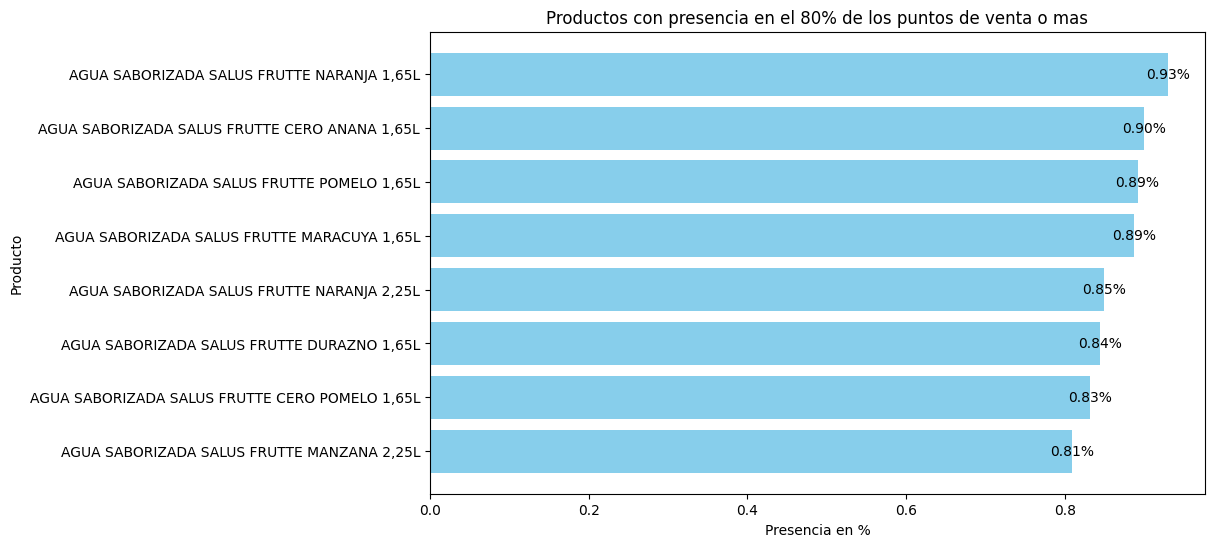

In [ ]:
df_reducido = df_reducido.sort_values(by='%', ascending=True)

plt.figure(figsize=(10, 6))
_grafico_barras=plt.barh(df_reducido['descripcion'],df_reducido['%'],color='skyblue')

# Añadir etiquetas dentro de las barras
for bar in _grafico_barras:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}%',
             ha='center', va='center', fontsize=10, color='black')

plt.title('Productos con presencia en el 80% de los puntos de venta o mas')
plt.xlabel('Presencia en %')
plt.ylabel('Producto')

####Pregunta N°2
Ordenar los productos de mayor a menor según su venta en volumen medido litros (suma de los 6
meses) y quedarse con los que acumulan el 80% (Pareto).

Para responder la consigna, vamos a calcular la venta total para todo el periodo considerado de cada producto, medida en litros, y luego obtenemos el % que representa respecto a la venta total en litros para todos los productos (share). De esta forma, podremos analizar cuáles son los productos más representativos y que más peso tienen en nuestra venta en volumen.

In [ ]:
_df_ventas_pareto=_df_completo.copy()

#Convierto el contenido a litros
_df_ventas_pareto['contenido_litros'] =_df_ventas_pareto['contenido']/1000

#Obtengo la venta en litros
_df_ventas_pareto['venta_litros'] = _df_ventas_pareto['cant_vta']*_df_ventas_pareto['contenido_litros']

#Obtengo el total de litros vendidos
_total_litros_vendidos=_df_ventas_pareto['venta_litros'].sum()

#Agrupo la venta por producto en litros
_df_ventas_pareto = _df_ventas_pareto.groupby(['codigo_barras','descripcion'])[['venta_litros']].sum()

#Calculo el share en litros de cada producto sobre la venta total de litros
_df_ventas_pareto['share_litros'] = _df_ventas_pareto['venta_litros']/_total_litros_vendidos
_df_ventas_pareto = _df_ventas_pareto.sort_values(by='share_litros',ascending=False)

#Obtengo el acumulado
_df_ventas_pareto['pareto'] =_df_ventas_pareto['share_litros'].cumsum()
_df_ventas_pareto = _df_ventas_pareto.reset_index()
_df_ventas_pareto['sku_count'] = _df_ventas_pareto.index + 1
_df_ventas_pareto

,codigo_barras,descripcion,venta_litros,share_litros,pareto,sku_count
0,7730400003300,"AGUA SABORIZADA SALUS FRUTTE NARANJA 2,25L",70098.75,0.108875,0.108875,1
1,7730400003920,"AGUA SABORIZADA SALUS FRUTTE NARANJA 1,65L",52272.00,0.081187,0.190061,2
2,7730400001707,"AGUA SABORIZADA SALUS FRUTTE CERO ANANA 1,65L",51418.95,0.079862,0.269923,3
3,7730400001247,"AGUA SABORIZADA SALUS FRUTTE CERO NARANJA 2,25L",50870.25,0.079010,0.348933,4
4,7730400003980,"AGUA SABORIZADA SALUS FRUTTE MANZANA 2,25L",43746.75,0.067946,0.416878,5
5,7730400003556,"AGUA SABORIZADA SALUS FRUTTE POMELO 2,25L",43492.50,0.067551,0.484429,6
6,7730400003432,"AGUA SABORIZADA SALUS FRUTTE MARACUYA 1,65L",34080.75,0.052933,0.537362,7
7,7730400003480,"AGUA SABORIZADA SALUS FRUTTE POMELO 1,65L",32384.55,0.050298,0.587660,8
8,7730400001835,"AGUA SABORIZADA SALUS FRUTTE CERO POMELO 1,65L",29497.05,0.045814,0.633474,9
9,7730400001161,"AGUA SABORIZADA SALUS FRUTTE CERO POMELO 2,25L",29119.50,0.045227,0.678701,10


Graficamente:

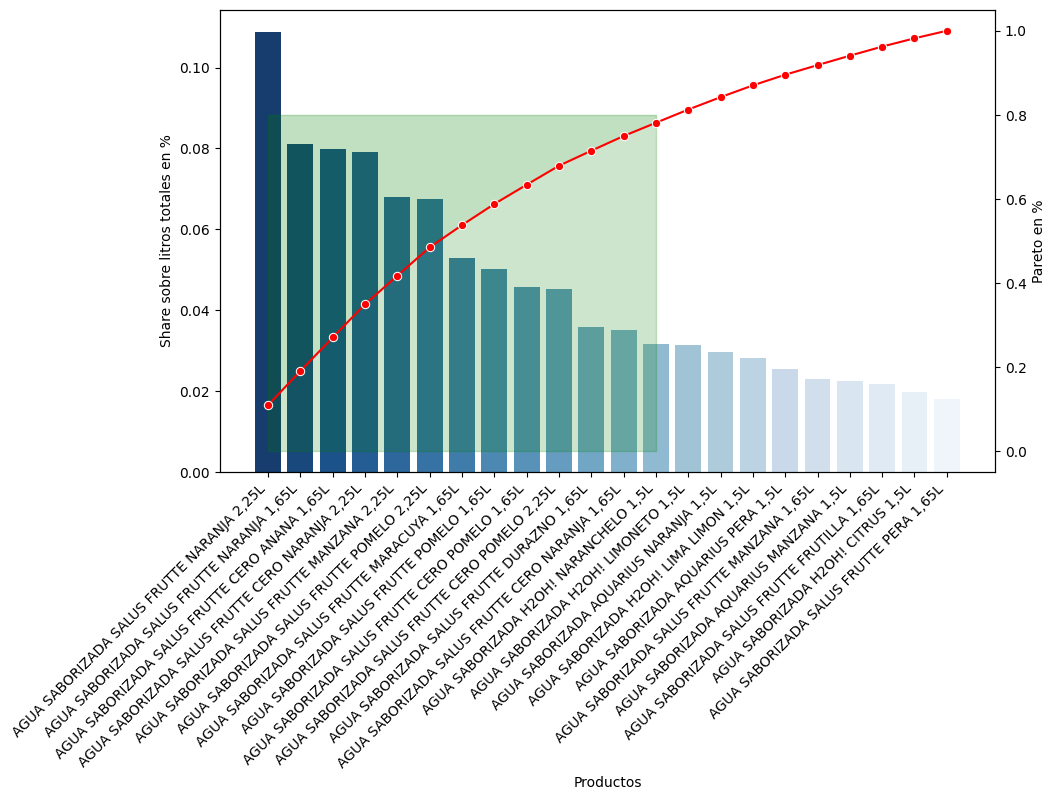

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

#Palerta de colores
colores = sns.color_palette("Blues", n_colors=len(_df_ventas_pareto))

#Creamos un gráfico de barras de la libreria seaborn
sns.barplot(x='descripcion', y='share_litros', data=_df_ventas_pareto, ax=ax1, palette=colores,hue='share_litros',legend=False)
ax1.set_ylabel('Share sobre litros totales en %')

ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


#Añadimos un segundo eje Y
ax2 = ax1.twinx()

#Graficamos la línea de pareto
sns.lineplot(x='descripcion', y='pareto', data=_df_ventas_pareto, ax=ax2, color='r', marker='o')
ax2.set_ylabel('Pareto en %')
ax1.set_xlabel('Productos')


#Especificamos un valor de interés para resaltar el área.
_share_interés = 0.80

#Resaltamos el área de interés
ax2.fill_between(_df_ventas_pareto['descripcion'], _df_ventas_pareto['pareto'], _share_interés, where=(_df_ventas_pareto['pareto'] <= _share_interés), color='g', alpha=0.05)
ax2.fill_between(_df_ventas_pareto['descripcion'], 0, _share_interés, where=(_df_ventas_pareto['pareto'] <= _share_interés), color='g', alpha=0.2)

El pareto nos permite llegar a conclusiones como **"El 80% de la venta en volumen es generada por el 60% de los SKU"**. Lo valioso de este cálculo, es que nos permite identificar los productos más relevantes a la hora de mejorar los KPI´s y definir los OKR´s que se desean alcanzar, estableciendo prioridades y focalizando los esfuerzos.

In [ ]:
_cantidad_sku = _df_ventas_pareto[_df_ventas_pareto['pareto']<=_share_interés]['sku_count'].max()
print(f'\033[1mEl 80% de la venta en volumen es generada por {_cantidad_sku} productos, que representan el {np.round(_cantidad_sku/len(_df_ventas_pareto),2)*100}% del total de productos\033[0m')

El 80% de la venta en volumen es generada por 13 productos, que representan el 59.0% del total de productos


In [ ]:
_listado_productos_share_objetivo=_df_ventas_pareto[_df_ventas_pareto['pareto']<=_share_interés]['codigo_barras'].to_list()
_listado_productos_share_objetivo

['7730400003300',
 '7730400003920',
 '7730400001707',
 '7730400001247',
 '7730400003980',
 '7730400003556',
 '7730400003432',
 '7730400003480',
 '7730400001835',
 '7730400001161',
 '7730400003002',
 '7730400001518',
 '7734284001157']

####Pregunta N°3
Obtener para cada producto el identificador (pdv_codigo) de uno cualquiera de los puntos de venta que
lo vende con mayor frecuencia.
Considerar solamente los productos que están presentes en al menos el 80% de los puntos de venta
(pregunta 1) y en el top 80% de la venta en volumen (pregunta 2).
Si un punto de venta no tiene venta de ningún producto en una fecha, se deberá considerar que esa
fecha el punto de venta estuvo cerrado.
Para el cálculo de la frecuencia considerar solamente los días que el punto de venta estuvo abierto (tuvo
alguna venta). Por ejemplo, si un producto en un punto de venta se vende todos los días de lunes a
sábado y el punto de venta está cerrado los domingos, la frecuencia tiene que ser cada 1 día.

En primer lugar, debemos filtrar el dataframe para dejar sólo los productos que están en al menos el 80% de los puntos de venta.

In [ ]:
#Filtramos con la lista generada en la pregunta n°1.
_df_pregunta_3 = _df_completo.copy()
_df_pregunta_3 = _df_pregunta_3[_df_pregunta_3['codigo_barras'].isin(listado_productos_presencia)]
_df_pregunta_3

,fecha_comercial,pdv_codigo,codigo_barras,imp_vta,cant_vta,precio,descripcion,marca,proveedor,contenido
2,2020-06-11,7604,7730400003002,77.00,1,77.00,"AGUA SABORIZADA SALUS FRUTTE DURAZNO 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650
4,2020-06-07,8008,7730400001835,84.00,1,84.00,"AGUA SABORIZADA SALUS FRUTTE CERO POMELO 1,65L",SALUS FRUTTE CERO,COMPAÑIA SALUS SA,1650
7,2020-06-23,7748,7730400003002,77.00,1,77.00,"AGUA SABORIZADA SALUS FRUTTE DURAZNO 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650
8,2020-06-23,7426,7730400003480,77.00,1,77.00,"AGUA SABORIZADA SALUS FRUTTE POMELO 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650
10,2020-06-02,3207,7730400003920,231.03,3,77.01,"AGUA SABORIZADA SALUS FRUTTE NARANJA 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650
...,...,...,...,...,...,...,...,...,...,...
242238,2020-11-06,40,7730400003920,84.00,1,84.00,"AGUA SABORIZADA SALUS FRUTTE NARANJA 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650
242239,2020-11-22,1416,7730400003432,184.00,2,92.00,"AGUA SABORIZADA SALUS FRUTTE MARACUYA 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650
242241,2020-11-18,663,7730400003920,84.00,1,84.00,"AGUA SABORIZADA SALUS FRUTTE NARANJA 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650
242244,2020-11-11,7817,7730400003432,504.00,6,84.00,"AGUA SABORIZADA SALUS FRUTTE MARACUYA 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650


En segundo lugar, dejamos solamente los productos que se encuentran en el 80% del pareto de ventas en volumen.

In [ ]:
_df_pregunta_3 = _df_pregunta_3[_df_pregunta_3['codigo_barras'].isin(_listado_productos_share_objetivo)]
_df_pregunta_3

,fecha_comercial,pdv_codigo,codigo_barras,imp_vta,cant_vta,precio,descripcion,marca,proveedor,contenido
2,2020-06-11,7604,7730400003002,77.00,1,77.00,"AGUA SABORIZADA SALUS FRUTTE DURAZNO 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650
4,2020-06-07,8008,7730400001835,84.00,1,84.00,"AGUA SABORIZADA SALUS FRUTTE CERO POMELO 1,65L",SALUS FRUTTE CERO,COMPAÑIA SALUS SA,1650
7,2020-06-23,7748,7730400003002,77.00,1,77.00,"AGUA SABORIZADA SALUS FRUTTE DURAZNO 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650
8,2020-06-23,7426,7730400003480,77.00,1,77.00,"AGUA SABORIZADA SALUS FRUTTE POMELO 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650
10,2020-06-02,3207,7730400003920,231.03,3,77.01,"AGUA SABORIZADA SALUS FRUTTE NARANJA 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650
...,...,...,...,...,...,...,...,...,...,...
242238,2020-11-06,40,7730400003920,84.00,1,84.00,"AGUA SABORIZADA SALUS FRUTTE NARANJA 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650
242239,2020-11-22,1416,7730400003432,184.00,2,92.00,"AGUA SABORIZADA SALUS FRUTTE MARACUYA 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650
242241,2020-11-18,663,7730400003920,84.00,1,84.00,"AGUA SABORIZADA SALUS FRUTTE NARANJA 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650
242244,2020-11-11,7817,7730400003432,504.00,6,84.00,"AGUA SABORIZADA SALUS FRUTTE MARACUYA 1,65L",SALUS FRUTTE,COMPAÑIA SALUS SA,1650


Podemos ver que, en el segundo paso, el resultado es el mismo. Es decir que existen productos que están en el share del 80% del volumen de ventas pero que se venden en menos del 80% de los puntos de venta. Esto es un dato muy relevante, ya que aumentar el surtido de esas tiendas e incluir estos productos podría mejorar el resultado de las ventas de forma notable la performance de venta.

In [ ]:
#Mapeo las descripciones
mapping_dict = _df_productos_v2.set_index('codigo_barras')['descripcion'].to_dict()

#Reemplazo código por descripción
_share_pareto_80 = [mapping_dict.get(item, item) for item in _listado_productos_share_objetivo]
_venta_80_pdv = [mapping_dict.get(item, item) for item in listado_productos_presencia]

_sku_posible_mejora = list(set(_share_pareto_80) - set(_venta_80_pdv))
print("\033[1mLos siguientes productos están en el pareto del 80% de las ventas pero se venden en menos del 80% de los puntos de venta:\033[0m", _sku_posible_mejora)

Los siguientes productos están en el pareto del 80% de las ventas pero se venden en menos del 80% de los puntos de venta: ['AGUA SABORIZADA SALUS FRUTTE CERO POMELO 2,25L', 'AGUA SABORIZADA H2OH! NARANCHELO 1,5L', 'AGUA SABORIZADA SALUS FRUTTE CERO NARANJA 2,25L', 'AGUA SABORIZADA SALUS FRUTTE POMELO 2,25L', 'AGUA SABORIZADA SALUS FRUTTE CERO NARANJA 1,65L']


Luego, vamos a obtener los días en los que los puntos de venta estuvieron abiertos, utilizando el supuesto de que estuvieron abiertos toda vez que hayan tenido al menos una venta. Esto lo realizamos con el dataframe original, ya que nos importa la existencia de ventas para cualquier producto.

In [ ]:
_df_fechas = _df_completo.copy()

#Obtengo todas las combinaciones de fecha-pdv_código, lo que nos indica los días en que estuvo abierto cada punto de venta.
_df_fechas = _df_fechas[['fecha_comercial','pdv_codigo']]

#Dejo sólo los valores únicos
_df_fechas = _df_fechas.drop_duplicates()

_df_fechas = _df_fechas.sort_values(by=['pdv_codigo','fecha_comercial'])

Y luego podemos visualizar en el siguiente dataframe la cantidad de días trabajados por punto de venta y mes.

In [ ]:
_df_dias_apertura = _df_fechas.copy()
_df_dias_apertura['mes'] = _df_fechas['fecha_comercial'].dt.month
_df_dias_apertura = _df_dias_apertura.groupby(['pdv_codigo','mes'])[['fecha_comercial']].count().reset_index()
_df_dias_apertura.rename(columns={'fecha_comercial':'Cantidad_días_trabajados'},inplace=True)
_df_dias_apertura

,pdv_codigo,mes,Cantidad_días_trabajados
0,105,8,24
1,105,9,22
2,105,10,30
3,105,11,30
4,106,6,27
...,...,...,...
2182,99,7,14
2183,99,8,15
2184,99,9,10
2185,99,10,12


Continuando con la consigna, obtenemos para todas los días en los que los puntos de venta estuvieron abiertos, la combinación con todos los sku activos en ellos y luego imputamos en la columna "Venta", mediante un booleano, si tuvieron venta o no de dicho producto.

In [ ]:
#Obtenemos todas las combinaciones posibles de fecha-pdv-codigo_barras
_df_ventas_dias=_df_fechas.copy()
_df_ventas_dias=_df_ventas_dias.merge(_df_pregunta_3.drop_duplicates(subset=['pdv_codigo','codigo_barras'])[['pdv_codigo','codigo_barras']],on='pdv_codigo',how='left')

#Averiguamos si efectivamente ocurrió una venta en cada una de esas combinaciones
_df_ventas_dias=_df_ventas_dias.merge(_df_pregunta_3[['pdv_codigo','codigo_barras','fecha_comercial','cant_vta']],on=['pdv_codigo','codigo_barras','fecha_comercial'],how='left')
_df_ventas_dias['cant_vta']=_df_ventas_dias['cant_vta'].fillna(0)
_df_ventas_dias['dias_venta']=np.where(_df_ventas_dias['cant_vta']>0,True,False)

#Obtengo el mes y el número de semana
_df_ventas_dias=_df_ventas_dias.sort_values(by=['pdv_codigo','codigo_barras','fecha_comercial'])
_df_ventas_dias['mes']=_df_ventas_dias['fecha_comercial'].dt.month
_df_ventas_dias['semana']=_df_ventas_dias['fecha_comercial'].dt.isocalendar().week
_df_ventas_dias

,fecha_comercial,pdv_codigo,codigo_barras,cant_vta,dias_venta,mes,semana
6,2020-08-01,105,7730400001707,0.0,False,8,31
14,2020-08-02,105,7730400001707,0.0,False,8,31
22,2020-08-03,105,7730400001707,0.0,False,8,32
30,2020-08-04,105,7730400001707,0.0,False,8,32
38,2020-08-05,105,7730400001707,0.0,False,8,32
...,...,...,...,...,...,...,...
405101,2020-11-22,99,7730400003920,0.0,False,11,47
405108,2020-11-24,99,7730400003920,1.0,True,11,48
405115,2020-11-27,99,7730400003920,1.0,True,11,48
405122,2020-11-28,99,7730400003920,1.0,True,11,48


Y luego obtengo la frecuencia de venta, en este caso, de forma mensual.

In [ ]:
_df_frequencia =_df_ventas_dias.copy()
#Agrupo por producto-mes-pdv y obtengo la cantidad de días que estuvo abierto el pdv, con venta posible.
_df_frequencia = _df_frequencia.groupby(['codigo_barras','mes','pdv_codigo'])[['dias_venta']].count().rename(columns={'dias_venta':'dias_abierto'})

#Obtengo sólo los dias en los que hubo venta de cada producto, mediante la columna dias_venta.
_df_frequencia_ventas=_df_ventas_dias[_df_ventas_dias['dias_venta']==True].copy()
_df_frequencia['dias_venta'] = _df_frequencia_ventas.groupby(['codigo_barras','mes','pdv_codigo'])[['dias_venta']].count()
_df_frequencia.fillna(0,inplace=True)

#Finalmente calculo la frequencia mensual de compra.
_df_frequencia['frequencia_mensual'] =_df_frequencia['dias_venta']/_df_frequencia['dias_abierto']
_df_frequencia

dias_abierto  dias_venta  frequencia_mensual
codigo_barras mes pdv_codigo                                              
7730400001707 6   106                   27         4.0            0.148148
                  1207                  27         0.0            0.000000
                  1279                  18         3.0            0.166667
                  131                   29        10.0            0.344828
                  1351                  15         3.0            0.200000
...                                    ...         ...                 ...
7730400003980 11  9587                  29        14.0            0.482759
                  9613                  19         3.0            0.157895
                  9658                  23         1.0            0.043478
                  9672                  30        17.0            0.566667
                  9710                  26         7.0            0.269231

[15594 rows x 3 columns]

En este caso, obtuvimos la frequencia de venta mensual, aunque tambien prodría ser calculada de forma mensual o para el periodo completo utilizando el mismo cálculo. La lectura de dicho cálculo permite llegar a conclusiones como **"El producto X en el PDV Y se vende cada Z cantidad de días".**
A continuación, obtenemos para cada producto-mes, uno de los puntos de venta que lo vende con mayor frequencia, dentro del top 3.

In [ ]:
_df_top_frequencia =_df_frequencia.copy().reset_index()

#Ordeno el dataframe por frequencia de venta mensual
_df_top_frequencia.sort_values(by=['codigo_barras','mes','frequencia_mensual'],ascending=[False,True,False],inplace=True)

#Elejir el top
_top = 3

#Selecciono el top de mayor frequencia por producto-pdv
def top_freq(group):
    return group.nlargest(_top, 'frequencia_mensual')

#Filtro sólo ese top
_df_top_frequencia = _df_top_frequencia.groupby(['codigo_barras', 'mes']).apply(top_freq).reset_index(drop=True)


#Me quedo con una muestra de n=1 dentro del top elegido
def muestra_random(group):
    return group.sample(n=1)

#Aplico la función a cada caso para obtener un pdv por mes.
_df_top_frequencia = _df_top_frequencia.groupby(['codigo_barras', 'mes']).apply(muestra_random).reset_index(drop=True)
_df_top_frequencia

,codigo_barras,mes,pdv_codigo,dias_abierto,dias_venta,frequencia_mensual
0,7730400001707,6,7234,30,27.0,0.900000
1,7730400001707,7,245,14,12.0,0.857143
2,7730400001707,8,7074,25,23.0,0.920000
3,7730400001707,9,7074,26,24.0,0.923077
4,7730400001707,10,9575,9,8.0,0.888889
5,7730400001707,11,5836,30,27.0,0.900000
6,7730400001835,6,210,30,21.0,0.700000
7,7730400001835,7,295,31,22.0,0.709677
8,7730400001835,8,4911,31,24.0,0.774194
9,7730400001835,9,2040,26,22.0,0.846154


####Pregunta N°4
¿Cuál sería una forma adecuada de calcular la variación porcentual de la venta de la categoría Aguas
Saborizadas (suma de la venta de todos los productos) durante los meses de setiembre a noviembre
(suma de los meses) en relación a los meses de junio a agosto?
Calcule esta variación.
Tener en cuenta que no necesariamente tenemos información de todos los puntos de venta para todos
los meses

En primer lugar, tenemos que considerar tal cual menciona el enunciado, que no tenemos información acerca de las ventas de todos los puntos de venta para todos los meses. Sólo disponemos de 191 puntos de venta con datos para todos los meses

In [ ]:
def meses_con_pdv(_df):

  _df_cantidad_pdv = _df.copy()

  #Obtengo el mes
  _df_cantidad_pdv['mes']=_df_cantidad_pdv['fecha_comercial'].dt.month

  #Obtengo las combinaciones mes-pdv, borrando duplicados para tener valores únicos.
  _df_cantidad_pdv =_df_cantidad_pdv.drop_duplicates(subset=['pdv_codigo','mes'])

  #CUento por PDV la cantidad de meses con datos
  _df_cantidad_pdv = _df_cantidad_pdv.groupby(['pdv_codigo'])[['mes']].count().reset_index()

  _df_cantidad_pdv.rename(columns={'pdv_codigo':'Cantidad_puntos_venta','mes':'Meses_con_datos'},inplace=True)

  #Cuento la cantidad de veces que aparece cada pdv, por ende la cantidad de meses con datos.
  _df_cantidad_pdv=_df_cantidad_pdv.groupby(['Meses_con_datos']).count()


  return _df_cantidad_pdv

meses_con_pdv(_df_completo)


,Cantidad_puntos_venta
Meses_con_datos,
1,12
2,18
3,8
4,236
5,5
6,191


Por otra parte, la cantidad de días en las que los puntos de venta estuvieron abiertos varía mucho de un mes a otro, lo cuál distorsiona tambien la medición de la variación porcentual(siempre en relación a lo que uno desee medir, por ejemplo, el efecto de una promoción o una determinada política de precio) entre los meses considerados.

In [ ]:
def dias_venta_por_pdv(_df):
  _df_dias_trabajados=_df.copy()

  #Obtengo las combinaciones de fecha(apertura) y pdv, únicas.
  _df_dias_trabajados = _df_dias_trabajados.sort_values(by=['fecha_comercial'])
  _df_dias_trabajados = _df_dias_trabajados[['fecha_comercial','pdv_codigo']]
  _df_dias_trabajados = _df_dias_trabajados.drop_duplicates()

  _df_dias_trabajados['mes'] =_df_dias_trabajados['fecha_comercial'].dt.month

  #Agrupo por pdv-mes y cuento los días de apertura
  _df_dias_trabajados = _df_dias_trabajados.groupby(['pdv_codigo','mes'])[['fecha_comercial']].count().reset_index()
  _df_dias_trabajados.rename(columns={'fecha_comercial':'Cantidad_días_trabajados'},inplace=True)
  return _df_dias_trabajados

_df_dias_trabajados=dias_venta_por_pdv(_df_completo)
_df_dias_trabajados

,pdv_codigo,mes,Cantidad_días_trabajados
0,105,8,24
1,105,9,22
2,105,10,30
3,105,11,30
4,106,6,27
...,...,...,...
2182,99,7,14
2183,99,8,15
2184,99,9,10
2185,99,10,12


Por lo tanto, una forma de evitar el efecto de la variabilidad en la cantidad de días abiertos y de los puntos de venta sobre el cálculo de la variación en las ventas, si se quiere obtener una medida que no esté influenciada por estas variables y que responda a otros fenómenos como cambios en los precios, sería calcular el promedio de ventas por franquicia y por día, luego mensualizarlo y finalmente calcular el promedio para los meses indicados, para asi obtener la variación porcentual.

In [ ]:
#Función para obtener el total de pdv por mes

def pdv_por_mes(_df):

  _df_pdv_por_mes = _df.copy()

  #Obtengo el mes
  _df_pdv_por_mes['mes']=_df_pdv_por_mes['fecha_comercial'].dt.month

  #Obtengo las combinaciones mes-pdv, borrando duplicados para tener valores únicos.
  _df_pdv_por_mes =_df_pdv_por_mes.drop_duplicates(subset=['pdv_codigo','mes'])

  #CUento por mes la cantidad de pdv total
  _df_pdv_por_mes = _df_pdv_por_mes.groupby(['mes'])[['pdv_codigo']].count().reset_index()
  _df_pdv_por_mes.rename(columns={'pdv_codigo':'Cantidad_pdv_total'},inplace=True)

  return _df_pdv_por_mes

_df_pdv_por_mes=pdv_por_mes(_df_completo)

In [ ]:
def variación_promedio_venta (_df):

  _df_n4_promedio=_df.copy()
  _df_n4_promedio['mes']=_df_n4_promedio['fecha_comercial'].dt.month

  #Obtengo de las funciones anteriores la cantidad de puntos de venta abiertos por mes y los dias trabajados para cada pdv.
  _df_n4_promedio=_df_n4_promedio.merge(_df_dias_trabajados,on=['pdv_codigo','mes'],how='left')
  _df_n4_promedio=_df_n4_promedio.merge(_df_pdv_por_mes,on=['mes'],how='left')

  #Obtengo la suma de ventas, la media de dias trabajados(el valor mismo) y la media de los puntos de ventas abiertos(el valor mismo), por mes y pdv.
  _df_n4_promedio=_df_n4_promedio.groupby(['pdv_codigo','mes']).agg({'cant_vta': 'sum', 'Cantidad_días_trabajados': 'mean','Cantidad_pdv_total': 'mean'}).reset_index()

  #Obtengo la venta promedio por día y por pdv.
  _df_n4_promedio['Vta_promedio']=_df_n4_promedio['cant_vta']/_df_n4_promedio['Cantidad_días_trabajados']

  #Obtengo la venta promedio y la cantidad de pdv abiertos en promedio por mes.
  _df_n4_promedio= _df_n4_promedio.groupby(['mes']).agg({'Vta_promedio': 'mean','Cantidad_pdv_total': 'mean'}).reset_index()

  #Divido en grupos según los meses 6-7-8 y 9-10-11
  _df_n4_promedio['grupo'] = np.where(_df_n4_promedio['mes']<=8,'JUN-JUL-AGO','SEP-OCT-NOV')

  #CAlculo la media por grupo.
  _df_n4_promedio = _df_n4_promedio.groupby('grupo')[['Vta_promedio']].mean()

  #Finalmente calculo la variación
  _df_n4_promedio['Variación % - Vta promedio']=round(((_df_n4_promedio['Vta_promedio']/_df_n4_promedio['Vta_promedio'].shift(1))-1)*100,2).fillna(0)

  return _df_n4_promedio

variación_promedio_venta(_df_completo)

,Vta_promedio,Variación % - Vta promedio
grupo,,
JUN-JUL-AGO,5.267217,0.00
SEP-OCT-NOV,6.177771,17.29


Por el contrario, si realizamos la variación sin tener en cuenta tanto la diferencia en la cantidad de días en los que los pdv estuvieron abiertos entre los meses o la cantidad de puntos de venta de los cuáles tenemos información por mes, el resultado es el siguiente:

In [ ]:
def variación_venta (_df):
  _df_n4=_df.copy()
  _df_n4['mes']=_df_n4['fecha_comercial'].dt.month
  _df_n4=_df_n4.groupby(['mes'])[['cant_vta']].sum().reset_index()
  _df_n4['grupo'] = np.where(_df_n4['mes']<=8,'JUN-JUL-AGO','SEP-OCT-NOV')
  _df_n4=_df_n4.groupby('grupo')[['cant_vta']].sum()
  _df_n4['Variación % - Sin Ajustes']=round((((_df_n4['cant_vta']/_df_n4['cant_vta'].shift(1))-1)*100).fillna(0),2)
  return _df_n4

variación_venta(_df_completo)

,cant_vta,Variación % - Sin Ajustes
grupo,,
JUN-JUL-AGO,125197,0.0
SEP-OCT-NOV,233998,86.9


Y si consideramos sólo los PDV para los cuáles tenemos información en los 6 meses:

In [ ]:
def pdv_datos_completos(_df):
  #Realizo las transformaciones en el dataframe
  _df_pdv_completos=_df.copy()
  _df_pdv_completos['fecha_comercial'] = pd.to_datetime(_df_pdv_completos['fecha_comercial'])
  _df_pdv_completos['mes'] = _df_pdv_completos['fecha_comercial'].dt.month
  _df_pdv_completos['mes'] = _df_pdv_completos['mes'].astype(int)

  _df_pdv_completos=_df_pdv_completos.drop_duplicates(subset=['pdv_codigo','mes'])

  _df_pdv_completos =_df_pdv_completos.groupby(['pdv_codigo'])[['mes']].count().reset_index()

  #FIltro sólo el mes 6
  _df_pdv_completos = _df_pdv_completos[_df_pdv_completos['mes']==6]

  #Listo los pdv que están en el mes 6
  _lista_pdv = _df_pdv_completos['pdv_codigo'].to_list()

  return _lista_pdv

_lista_pdv=pdv_datos_completos(_df_completo)

In [ ]:
def variación_venta_pdv_datos_completos(_df):
  _df_variacion_pdv_completos=_df.copy()

  #Filtro el dataframe por los pdv que obtuve en la lista anterior
  _df_variacion_pdv_completos=_df_variacion_pdv_completos[_df_variacion_pdv_completos['pdv_codigo'].isin(_lista_pdv)]
  _df_variacion_pdv_completos['mes']=_df_variacion_pdv_completos['fecha_comercial'].dt.month

  #Realizo las misma operaciones que hice anteriormente
  _df_variacion_pdv_completos=_df_variacion_pdv_completos.groupby(['mes'])[['cant_vta']].sum().reset_index()
  _df_variacion_pdv_completos['grupo'] = np.where(_df_variacion_pdv_completos['mes']<=8,'JUN-JUL-AGO','SEP-OCT-NOV')
  _df_variacion_pdv_completos=_df_variacion_pdv_completos.groupby('grupo')[['cant_vta']].sum()
  _df_variacion_pdv_completos['Variación % - Mismos PDV']=round((((_df_variacion_pdv_completos['cant_vta']/_df_variacion_pdv_completos['cant_vta'].shift(1))-1)*100).fillna(0),2)
  return _df_variacion_pdv_completos

variación_venta_pdv_datos_completos(_df_completo)

,cant_vta,Variación % - Mismos PDV
grupo,,
JUN-JUL-AGO,88743,0.00
SEP-OCT-NOV,108275,22.01


Por último, comparo los 3 resultados obtenidos:

In [ ]:
_df_comparación = pd.concat([variación_promedio_venta(_df_completo),variación_venta_pdv_datos_completos(_df_completo),variación_venta(_df_completo)],axis=1)
_df_comparación.iloc[1:2, _df_comparación.columns.str.contains('Variación')]


,Variación % - Vta promedio,Variación % - Mismos PDV,Variación % - Sin Ajustes
grupo,,,
SEP-OCT-NOV,17.29,22.01,86.9


####Pregunta N°5
Identificar a partir de los datos proporcionados al menos una causa probable por la cual la venta de
SALUS FRUTTE CERO ANANA 1,65L ha crecido en el mes de setiembre. Mostrar evidencias

Para analizar los posibles determinantes del aumento en la venta del producto **SALUS FRUTTE CERO ANANA 1,65L** , podemos observar que sucede con los siguientes dos fenómenos:


*   *Efecto precio:* por definición económica, movimientos en el precio de venta del propio producto, generarán un aumento o disminución en la cantidad demandada del mismo.

*   *Efecto sustitución:* por definición económica, movimientos en el precio de venta de los productos más sustitutos generaran un aumento(caso en que el producto sustituto se vuelve más caro) o una disminución(caso en que el producto sustituto se hace más barato) de la demanda del producto al cuál sustituyen. Estos cambios en la demanda, hacen que la curva se desplace y por ende cambia la disposición a pagar para cada cantidad demandada(Ante precio constante del producto, aumenta o disminuye la cantidad demandada del mismo por un cambio en el precio del bien sustituto o complementario)



En primer lugar, identificamos los productos sustitutos, considerando todos aquellos que pertenecen a la marca **SALUS FRUTTE CERO**, ya que la descripción "CERO" es utilizada comunmente para aquellas bebidas con un nivel reducido de azúcares. Esta característica tiene un impacto en el gusto de las personas y por ende se ve reflejada en la demanda de estos productos, con lo cuál es esperable que sean los sustitutos más próximos entre si. A su vez, podríamos analizar otra bebida con el mismo gusto frutal pero en otra presentación, aunque no encontramos ninguna.

In [ ]:
#Productos de la marca SALUS FRUTTE CERO
_df_n5_cero = _df_completo.copy()
_df_n5_cero = _df_n5_cero[_df_n5_cero['marca']=='SALUS FRUTTE CERO']
_df_n5_cero['descripcion'].unique()

array(['AGUA SABORIZADA SALUS FRUTTE CERO NARANJA 1,65L',
       'AGUA SABORIZADA SALUS FRUTTE CERO POMELO 1,65L',
       'AGUA SABORIZADA SALUS FRUTTE CERO ANANA 1,65L',
       'AGUA SABORIZADA SALUS FRUTTE CERO NARANJA 2,25L',
       'AGUA SABORIZADA SALUS FRUTTE CERO POMELO 2,25L'], dtype=object)

Podemos reducir la clasificación a sólo los productos con la misma volumetría de 1.65L

In [ ]:
_df_n5_cero=_df_n5_cero[_df_n5_cero['descripcion'].str.contains('1,65L')]
_df_n5_cero['descripcion'].unique()

array(['AGUA SABORIZADA SALUS FRUTTE CERO NARANJA 1,65L',
       'AGUA SABORIZADA SALUS FRUTTE CERO POMELO 1,65L',
       'AGUA SABORIZADA SALUS FRUTTE CERO ANANA 1,65L'], dtype=object)

In [ ]:
#Obtengo el mes
_df_n5_cero['mes'] = _df_n5_cero['fecha_comercial'].dt.month
_df_n5_cero['mes'] = _df_n5_cero['mes'].astype(int)

#Obtengo el precio medio de cada producto por mes
_df_n5_cero_agrupado = _df_n5_cero.groupby(['descripcion','mes'])[['precio','cant_vta']].mean().reset_index()
_df_n5_cero_agrupado = _df_n5_cero_agrupado.sort_values(by=['descripcion', 'mes'])

#Filtro Agosto y Septiembre para obtener la variación de precio entre esos dos meses.
_df_n5_cero_var= _df_n5_cero_agrupado[(_df_n5_cero_agrupado['mes']==9)|(_df_n5_cero_agrupado['mes']==8)].copy()
_df_n5_cero_var['Var %'] = _df_n5_cero_var.groupby('descripcion')['precio'].transform(lambda x: (x / x.shift(1) - 1) * 100)
_df_n5_cero_var=_df_n5_cero_var.dropna()

_df_n5_cero_var

<ipython-input-41-5587b10e8713>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_n5_cero['mes'] = _df_n5_cero['fecha_comercial'].dt.month
<ipython-input-41-5587b10e8713>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_n5_cero['mes'] = _df_n5_cero['mes'].astype(int)


,descripcion,mes,precio,cant_vta,Var %
3,"AGUA SABORIZADA SALUS FRUTTE CERO ANANA 1,65L",9,71.990000,2.575618,-11.846307
9,"AGUA SABORIZADA SALUS FRUTTE CERO NARANJA 1,65L",9,83.420544,1.372219,2.953376
15,"AGUA SABORIZADA SALUS FRUTTE CERO POMELO 1,65L",9,84.127035,1.148760,3.208702


Podemos observar que para el agua saborizada de Anana, la variación del precio entre Agosto y Septiembre es de **-11.84%** mientras que en el caso del agua saborizada de naranja es de **+2.95%** y **+3.20%** para la de pomelo. Por lo tanto, estos resultado siguen en la misma linea que lo expresado anteriormente respecto al efecto precio y al efecto sustitución.

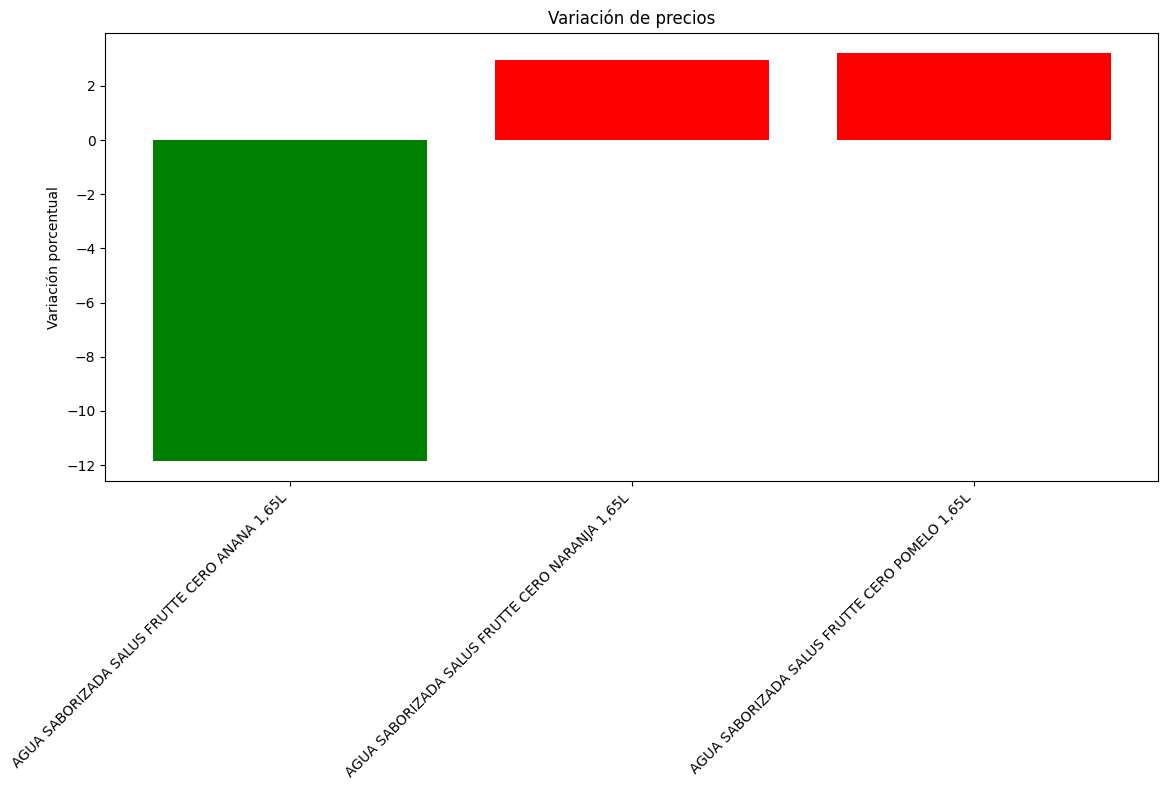

In [ ]:
#Gráfico de cascada
fig, ax = plt.subplots(figsize=(12, 8))

#Variaciones positivas en rojo y negativas en verde.
colors = ['red' if val > 0 else 'green' for val in _df_n5_cero_var['Var %']]
ax.bar(_df_n5_cero_var['descripcion'], _df_n5_cero_var['Var %'], color=colors)

#Titulos
ax.set_ylabel('Variación porcentual')
ax.set_title('Variación de precios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Podemos tambien, calcular la elasticidad precio punto y las elasticidades cruzadas. Sin embargo, dado que tenemos tanto una variación en el precio del propio bien como en los sustitutos, deberíamos plantear una regresión, ya que el calculo de la elasticidad requiere el supuesto que los demás factores ajenos al cálculo se mantengan constantes.

In [ ]:
def cálculo_elasticidad_dataframe(_df,sustituto_a,sustituto_b,producto):

  #Divido el dataframe de acuerdo a los productos sustitutos
  df_sustitutos_a=_df[_df['descripcion'] == sustituto_a].copy()
  df_sustitutos_b = _df[_df['descripcion'] == sustituto_b].copy()
  df_sustitutos_a.rename(columns={'precio': 'precio_naranja'},inplace=True)
  df_sustitutos_b.rename(columns={'precio': 'precio_pomelo'},inplace=True)

  #Mergeo nuevamente los datafranme
  df_elasticidad=_df[_df['descripcion'] == producto].copy()
  df_elasticidad = df_elasticidad.merge(df_sustitutos_a[['mes', 'precio_naranja']],on='mes',how='left')
  df_elasticidad = df_elasticidad.merge(df_sustitutos_b[['mes', 'precio_pomelo']],on='mes',how='left')

  return df_elasticidad

sustituto_a='AGUA SABORIZADA SALUS FRUTTE CERO NARANJA 1,65L'
sustituto_b='AGUA SABORIZADA SALUS FRUTTE CERO POMELO 1,65L'
producto='AGUA SABORIZADA SALUS FRUTTE CERO ANANA 1,65L'

df_elasticidad=cálculo_elasticidad_dataframe(_df_n5_cero_agrupado,sustituto_a,sustituto_b,producto)

In [ ]:
def cálculo_valor_elasticidad(_df):
  #Calculo las diferencias(deltas) en precios y cantidad
  _df['delta_precio_anana'] = _df['precio'].diff()
  _df['delta_precio_naranja'] = _df['precio_naranja'].diff()
  _df['delta_precio_pomelo'] = _df['precio_pomelo'].diff()
  _df['delta_cantidad_anana'] =_df['cant_vta'].diff()

  #Calculo la elasticidad precio punto del agua saborizada de ANANA y las elasticidades cruzadas respecto a los otros productos.
  _df['elasticidad'] = (_df['delta_cantidad_anana'] / _df['cant_vta']) / (_df['delta_precio_anana'] / _df['precio'])
  _df['elasticidad_cruzada_naranja']= (_df['delta_cantidad_anana'] / _df['cant_vta']) / (_df['delta_precio_naranja'] / _df['precio_naranja'])
  _df['elasticidad_cruzada_pomelo'] = (_df['delta_cantidad_anana'] / _df['cant_vta']) / (_df['delta_precio_pomelo'] / _df['precio_pomelo'])
  _df=_df[_df['mes'] == 9][['elasticidad','elasticidad_cruzada_naranja','delta_precio_pomelo']]
  elasticidad_septiembre = _df['elasticidad'].iloc[0]
  return _df

cálculo_valor_elasticidad(df_elasticidad)


,elasticidad,elasticidad_cruzada_naranja,delta_precio_pomelo
3,-3.064888,14.357503,2.615463


Podemos ver que los signos de las elasticidades están en linea con los argumentos mencionados más arriba, es decir, una elasticidad precio negativa y elasticidades cruzadas con los productos sustitutos positivas. Sin embargo, nuevamente, estas elasticidades fueron calculadas bajo el supuesto de ceteris paribus(los demas factores constantes), que claramente no se cumplen, ya que al mismo tiempo que cambian los precios de los productos sustitutos, cambia el precio del propio bien.
Podemos mediante SckitLearn, calcular una regresión lineal y obtener los coeficientes:

In [ ]:
def regresión_lineal_cantidades_vendidas(_df,sustituto_a,sustituto_b,producto):

  #Agrupo por material y fecha, para obtener el promedio de precio y cantidad vendida
  _df_regresion=_df.copy()
  _df_regresion=_df_regresion.groupby(['descripcion','fecha_comercial'])[['precio','cant_vta']].mean().reset_index()

  #Divido el dataframe de acuerdo a los productos sustitutos
  _df_regresion_sustitutos_a = _df_regresion[_df_regresion['descripcion'] == sustituto_a].copy()[['fecha_comercial','precio']]
  _df_regresion_sustitutos_b = _df_regresion[_df_regresion['descripcion'] == sustituto_b].copy()[['fecha_comercial','precio']]
  _df_regresion_sustitutos_a.rename(columns={'precio': 'precio_naranja'},inplace=True)
  _df_regresion_sustitutos_b.rename(columns={'precio': 'precio_pomelo'},inplace=True)

  #Mergeo nuevamente los datafranme
  _df_regresion=_df_regresion[_df_regresion['descripcion'] == producto].copy()[['fecha_comercial','precio','cant_vta']]
  _df_regresion = _df_regresion.merge(_df_regresion_sustitutos_a[['fecha_comercial', 'precio_naranja']],on='fecha_comercial',how='inner')
  _df_regresion = _df_regresion.merge(_df_regresion_sustitutos_b[['fecha_comercial', 'precio_pomelo']],on='fecha_comercial',how='inner')

  X = _df_regresion[['precio', 'precio_naranja', 'precio_pomelo']]
  y = _df_regresion['cant_vta']

  model = LinearRegression().fit(X, y)

  print(f"Coefficients: {model.coef_}")
  print(f"R cuadrado: {model.score(X, y)}")

regresión_lineal_cantidades_vendidas(_df_n5_cero,sustituto_a,sustituto_b,producto)


Coefficients: [-0.08302157  0.01387019  0.07380526]
R cuadrado: 0.8612037300101889


Finalmente, obtenemos los coeficientes, cuyos signos siguen en la misma dirección de lo esperado, lo cuál fortalece la explicación del aumento de las cantidades vendidas en el mes de Septiembre.